In [1]:
!pip install kaggle

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from kaggle.api.kaggle_api_extended import KaggleApi

pd.set_option('display.max_columns', None)

In [3]:
api = KaggleApi()
api.authenticate()

In [4]:
api.dataset_download_files('stefanoleone992/fifa-20-complete-player-dataset', path='./data', unzip=True)

In [5]:
df20 = pd.read_csv('./data/players_20.csv')

In [6]:
df19 = pd.read_csv('./data/players_19.csv')

In [7]:
df18 = pd.read_csv('./data/players_18.csv')

In [8]:
print(df20.head())

   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  ...   lwb   ldm  \
0        170         72   Argentina         FC Barc

In [9]:
print(df19.head())

   sofifa_id                                         player_url  \
0      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
1     158023  https://sofifa.com/player/158023/lionel-messi/...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     193080  https://sofifa.com/player/193080/david-de-gea-...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name  age         dob  \
0  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   33  1985-02-05   
1           L. Messi       Lionel Andrés Messi Cuccittini   31  1987-06-24   
2          Neymar Jr        Neymar da Silva Santos Junior   26  1992-02-05   
3             De Gea                David De Gea Quintana   27  1990-11-07   
4       K. De Bruyne                      Kevin De Bruyne   27  1991-06-28   

   height_cm  weight_kg nationality                 club  ...   lwb   ldm  \
0        187         83    Portugal             Juv

In [10]:
df20.shape

(18278, 104)

In [11]:
for i in df20.columns:
    print(i)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

In [12]:
df20_mod = df20.drop(columns=df20.loc[:, ["long_name", "player_url", "player_tags", 'release_clause_eur', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number']].columns.union(df20.loc[:, "player_traits":"rb"].columns))

#We first use .loc to select the "player_url" column and then access the columns attribute to retrieve its column name. We then combine this set of columns with the range of columns from "attacking_crossing" to "rb" (inclusive) using the union() method. Finally, the drop() function is used to remove these columns from the DataFrame, resulting in the modified DataFrame df20_mod.

#We should include more columns

In [13]:
df19_mod = df19.drop(columns=df19.loc[:, ["long_name", "player_url", "player_tags", 'release_clause_eur', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number']].columns.union(df19.loc[:, "player_traits":"rb"].columns))

In [14]:
df18_mod = df18.drop(columns=df18.loc[:, ["long_name", "player_url", "player_tags", 'release_clause_eur', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number']].columns.union(df18.loc[:, "player_traits":"rb"].columns))

In [15]:
df20_top10 = df20_mod.drop(df20_mod.index[10:18278])

#modify the rows to include the top 10 players in the world - mess around with this and then include more players

In [16]:
df20_mod.shape

(18278, 32)

In [17]:
print(df20_mod.head())

   sofifa_id         short_name  age         dob  height_cm  weight_kg  \
0     158023           L. Messi   32  1987-06-24        170         72   
1      20801  Cristiano Ronaldo   34  1985-02-05        187         83   
2     190871          Neymar Jr   27  1992-02-05        175         68   
3     200389           J. Oblak   26  1993-01-07        188         87   
4     183277          E. Hazard   28  1991-01-07        175         74   

  nationality                 club  overall  potential  ...  passing  \
0   Argentina         FC Barcelona       94         94  ...     92.0   
1    Portugal             Juventus       93         93  ...     82.0   
2      Brazil  Paris Saint-Germain       92         92  ...     87.0   
3    Slovenia      Atlético Madrid       91         93  ...      NaN   
4     Belgium          Real Madrid       91         91  ...     86.0   

   dribbling defending physic  gk_diving  gk_handling  gk_kicking gk_reflexes  \
0       96.0      39.0   66.0        NaN 

In [18]:
print(df19_mod.head())

   sofifa_id         short_name  age         dob  height_cm  weight_kg  \
0      20801  Cristiano Ronaldo   33  1985-02-05        187         83   
1     158023           L. Messi   31  1987-06-24        170         72   
2     190871          Neymar Jr   26  1992-02-05        175         68   
3     193080             De Gea   27  1990-11-07        193         76   
4     192985       K. De Bruyne   27  1991-06-28        181         70   

  nationality                 club  overall  potential  ...  passing  \
0    Portugal             Juventus       94         94  ...     81.0   
1   Argentina         FC Barcelona       94         94  ...     88.0   
2      Brazil  Paris Saint-Germain       92         93  ...     83.0   
3       Spain    Manchester United       91         93  ...      NaN   
4     Belgium      Manchester City       91         92  ...     92.0   

   dribbling defending physic  gk_diving  gk_handling  gk_kicking gk_reflexes  \
0       89.0      35.0   79.0        NaN 

In [19]:
print(df18_mod.head())

   sofifa_id         short_name  age         dob  height_cm  weight_kg  \
0      20801  Cristiano Ronaldo   32  1985-02-05        185         80   
1     158023           L. Messi   30  1987-06-24        170         72   
2     190871             Neymar   25  1992-02-05        175         68   
3     167495           M. Neuer   31  1986-03-27        193         92   
4     176580          L. Suárez   30  1987-01-24        182         86   

  nationality                 club  overall  potential  ...  passing  \
0    Portugal          Real Madrid       94         94  ...     82.0   
1   Argentina         FC Barcelona       93         93  ...     86.0   
2      Brazil  Paris Saint-Germain       92         94  ...     79.0   
3     Germany    FC Bayern München       92         92  ...      NaN   
4     Uruguay         FC Barcelona       92         92  ...     79.0   

   dribbling defending physic  gk_diving  gk_handling  gk_kicking gk_reflexes  \
0       90.0      33.0   80.0        NaN 

In [20]:
def merge_df(df1, df2, column_name, join_type, suff1, suff2):
    merged_df = df1.merge(df2, on=column_name, how=join_type, suffixes=(suff1, suff2))
    return merged_df

In [21]:
df_18_and_19 = merge_df(df18_mod, df19_mod, "sofifa_id", "inner", "_18", "_19")

In [22]:
print(df_18_and_19.head())

   sofifa_id      short_name_18  age_18      dob_18  height_cm_18  \
0      20801  Cristiano Ronaldo      32  1985-02-05           185   
1     158023           L. Messi      30  1987-06-24           170   
2     190871             Neymar      25  1992-02-05           175   
3     167495           M. Neuer      31  1986-03-27           193   
4     176580          L. Suárez      30  1987-01-24           182   

   weight_kg_18 nationality_18              club_18  overall_18  potential_18  \
0            80       Portugal          Real Madrid          94            94   
1            72      Argentina         FC Barcelona          93            93   
2            68         Brazil  Paris Saint-Germain          92            94   
3            92        Germany    FC Bayern München          92            92   
4            86        Uruguay         FC Barcelona          92            92   

   ...  passing_19  dribbling_19 defending_19 physic_19  gk_diving_19  \
0  ...        81.0       

In [23]:
df_18_19_20 = merge_df(df_18_and_19, df20_mod, "sofifa_id", "inner", "", "_20")

In [24]:
print(df_18_19_20.head())

   sofifa_id      short_name_18  age_18      dob_18  height_cm_18  \
0      20801  Cristiano Ronaldo      32  1985-02-05           185   
1     158023           L. Messi      30  1987-06-24           170   
2     190871             Neymar      25  1992-02-05           175   
3     167495           M. Neuer      31  1986-03-27           193   
4     176580          L. Suárez      30  1987-01-24           182   

   weight_kg_18 nationality_18              club_18  overall_18  potential_18  \
0            80       Portugal          Real Madrid          94            94   
1            72      Argentina         FC Barcelona          93            93   
2            68         Brazil  Paris Saint-Germain          92            94   
3            92        Germany    FC Bayern München          92            92   
4            86        Uruguay         FC Barcelona          92            92   

   ...  passing  dribbling defending physic  gk_diving  gk_handling  \
0  ...     82.0       89.0 

In [25]:
for i in df_18_19_20.columns:
    print(i)

sofifa_id
short_name_18
age_18
dob_18
height_cm_18
weight_kg_18
nationality_18
club_18
overall_18
potential_18
value_eur_18
wage_eur_18
player_positions_18
preferred_foot_18
international_reputation_18
weak_foot_18
skill_moves_18
work_rate_18
body_type_18
real_face_18
pace_18
shooting_18
passing_18
dribbling_18
defending_18
physic_18
gk_diving_18
gk_handling_18
gk_kicking_18
gk_reflexes_18
gk_speed_18
gk_positioning_18
short_name_19
age_19
dob_19
height_cm_19
weight_kg_19
nationality_19
club_19
overall_19
potential_19
value_eur_19
wage_eur_19
player_positions_19
preferred_foot_19
international_reputation_19
weak_foot_19
skill_moves_19
work_rate_19
body_type_19
real_face_19
pace_19
shooting_19
passing_19
dribbling_19
defending_19
physic_19
gk_diving_19
gk_handling_19
gk_kicking_19
gk_reflexes_19
gk_speed_19
gk_positioning_19
short_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skil

In [26]:
# See what Datatypes we are dealing with here

df_18_19_20.dtypes

sofifa_id           int64
short_name_18      object
age_18              int64
dob_18             object
height_cm_18        int64
                   ...   
gk_handling       float64
gk_kicking        float64
gk_reflexes       float64
gk_speed          float64
gk_positioning    float64
Length: 94, dtype: object

In [30]:
# Check for null values

df_18_19_20.isnull()

,sofifa_id,short_name_18,age_18,dob_18,height_cm_18,weight_kg_18,nationality_18,club_18,overall_18,potential_18,value_eur_18,wage_eur_18,player_positions_18,preferred_foot_18,international_reputation_18,weak_foot_18,skill_moves_18,work_rate_18,body_type_18,real_face_18,pace_18,shooting_18,passing_18,dribbling_18,defending_18,physic_18,gk_diving_18,gk_handling_18,gk_kicking_18,gk_reflexes_18,gk_speed_18,gk_positioning_18,short_name_19,age_19,dob_19,height_cm_19,weight_kg_19,nationality_19,club_19,overall_19,potential_19,value_eur_19,wage_eur_19,player_positions_19,preferred_foot_19,international_reputation_19,weak_foot_19,skill_moves_19,work_rate_19,body_type_19,real_face_19,pace_19,shooting_19,passing_19,dribbling_19,defending_19,physic_19,gk_diving_19,gk_handling_19,gk_kicking_19,gk_reflexes_19,gk_speed_19,gk_positioning_19,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [31]:
# Sum all null values and show this using a DataFrame (Transpose to show columns)

null_counts = df_18_19_20.isnull().sum()
null_counts_df = pd.DataFrame(null_counts).T

In [32]:
null_counts_df

,sofifa_id,short_name_18,age_18,dob_18,height_cm_18,weight_kg_18,nationality_18,club_18,overall_18,potential_18,value_eur_18,wage_eur_18,player_positions_18,preferred_foot_18,international_reputation_18,weak_foot_18,skill_moves_18,work_rate_18,body_type_18,real_face_18,pace_18,shooting_18,passing_18,dribbling_18,defending_18,physic_18,gk_diving_18,gk_handling_18,gk_kicking_18,gk_reflexes_18,gk_speed_18,gk_positioning_18,short_name_19,age_19,dob_19,height_cm_19,weight_kg_19,nationality_19,club_19,overall_19,potential_19,value_eur_19,wage_eur_19,player_positions_19,preferred_foot_19,international_reputation_19,weak_foot_19,skill_moves_19,work_rate_19,body_type_19,real_face_19,pace_19,shooting_19,passing_19,dribbling_19,defending_19,physic_19,gk_diving_19,gk_handling_19,gk_kicking_19,gk_reflexes_19,gk_speed_19,gk_positioning_19,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1073,1073,1073,1073,1073,1073,8814,8814,8814,8814,8814,8814,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1073,1073,1073,1073,1073,1073,8814,8814,8814,8814,8814,8814,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1073,1073,1073,1073,1073,1073,8814,8814,8814,8814,8814,8814


In [33]:
# Since the only null values in the dataset relate to stats, it's a good idea to replace the null value with value 0

df_18_19_20_filled = df_18_19_20.fillna(0)

In [34]:
# Check to see if null values have been removed

pd.DataFrame(df_18_19_20_filled.isnull().sum()).T

,sofifa_id,short_name_18,age_18,dob_18,height_cm_18,weight_kg_18,nationality_18,club_18,overall_18,potential_18,value_eur_18,wage_eur_18,player_positions_18,preferred_foot_18,international_reputation_18,weak_foot_18,skill_moves_18,work_rate_18,body_type_18,real_face_18,pace_18,shooting_18,passing_18,dribbling_18,defending_18,physic_18,gk_diving_18,gk_handling_18,gk_kicking_18,gk_reflexes_18,gk_speed_18,gk_positioning_18,short_name_19,age_19,dob_19,height_cm_19,weight_kg_19,nationality_19,club_19,overall_19,potential_19,value_eur_19,wage_eur_19,player_positions_19,preferred_foot_19,international_reputation_19,weak_foot_19,skill_moves_19,work_rate_19,body_type_19,real_face_19,pace_19,shooting_19,passing_19,dribbling_19,defending_19,physic_19,gk_diving_19,gk_handling_19,gk_kicking_19,gk_reflexes_19,gk_speed_19,gk_positioning_19,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
# Change variable name of final clean data set to make it more accessible

df_fifa = df_18_19_20_filled

In [36]:
# Set the index to the sofifa_id

df_fifa.set_index("sofifa_id", inplace=True)

In [37]:
print(df_fifa.head())

               short_name_18  age_18      dob_18  height_cm_18  weight_kg_18  \
sofifa_id                                                                      
20801      Cristiano Ronaldo      32  1985-02-05           185            80   
158023              L. Messi      30  1987-06-24           170            72   
190871                Neymar      25  1992-02-05           175            68   
167495              M. Neuer      31  1986-03-27           193            92   
176580             L. Suárez      30  1987-01-24           182            86   

          nationality_18              club_18  overall_18  potential_18  \
sofifa_id                                                                 
20801           Portugal          Real Madrid          94            94   
158023         Argentina         FC Barcelona          93            93   
190871            Brazil  Paris Saint-Germain          92            94   
167495           Germany    FC Bayern München          92       

In [38]:
# Lets run numpy functions to get a better feel for the age & overall columns (Take Fifa 20 values as an example)


# Calculate mean values
mean_age_value = np.mean(df_fifa["age"], axis=0)
print("Mean age value in Fifa 20 is:", mean_age_value)

mean_overall_value = np.mean(df_fifa["overall"], axis=0)
print("Mean overall value in Fifa 20 is:", mean_overall_value)


# Calculate the median values
median_age_value = np.median(df_fifa["age"], axis=0)
print("Median age value in Fifa 20 is:", median_age_value)

median_overall_value = np.median(df_fifa["overall"], axis=0)
print("Median overall value in Fifa 20 is:", median_overall_value)


# Calculate the min/max values
min_age_value = np.min(df_fifa["age"], axis=0)
print("Minimum age value in Fifa 20 is:", min_age_value)

max_age_value = np.max(df_fifa["age"], axis=0)
print("Maximum age value in Fifa 20 is:", max_age_value)

min_overall_value = np.min(df_fifa["overall"], axis=0)
print("Minimum overall value in Fifa 20 is:", min_overall_value)

max_overall_value = np.max(df_fifa["overall"], axis=0)
print("Maximum overall value in Fifa 20 is:", max_overall_value)



Mean age value in Fifa 20 is: 26.81551532315161
Mean overall value in Fifa 20 is: 69.6552038029736
Median age value in Fifa 20 is: 27.0
Median overall value in Fifa 20 is: 69.0
Minimum age value in Fifa 20 is: 18
Maximum age value in Fifa 20 is: 41
Minimum overall value in Fifa 20 is: 48
Maximum overall value in Fifa 20 is: 94


In [39]:
# Lets get summary statistics for all columns

df_fifa.describe()

,age_18,height_cm_18,weight_kg_18,overall_18,potential_18,value_eur_18,wage_eur_18,international_reputation_18,weak_foot_18,skill_moves_18,pace_18,shooting_18,passing_18,dribbling_18,defending_18,physic_18,gk_diving_18,gk_handling_18,gk_kicking_18,gk_reflexes_18,gk_speed_18,gk_positioning_18,age_19,height_cm_19,weight_kg_19,overall_19,potential_19,value_eur_19,wage_eur_19,international_reputation_19,weak_foot_19,skill_moves_19,pace_19,shooting_19,passing_19,dribbling_19,defending_19,physic_19,gk_diving_19,gk_handling_19,gk_kicking_19,gk_reflexes_19,gk_speed_19,gk_positioning_19,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning
count,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9.887000e+03,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9.887000e+03,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9.887000e+03,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000,9887.000000
mean,24.815414,181.506321,75.533731,68.151512,73.194498,3.484967e+06,16162.637807,1.173764,2.991706,2.354809,61.954182,47.807930,52.411551,57.000809,46.591989,59.180237,7.369172,7.063922,6.881056,7.474967,4.474664,7.092546,25.816324,181.638616,75.904420,69.178113,73.224942,3.742778e+06,14964.903409,1.176191,3.007282,2.473349,61.554769,48.778295,53.593405,57.904622,48.568828,60.275210,7.460908,7.161121,6.976535,7.577121,4.469404,7.221705,26.815515,181.698392,76.100637,69.655204,72.870436,3.909194e+06,14916.253666,1.178720,3.019824,2.507737,60.793062,49.505007,54.344695,58.399312,49.295135,60.761404,7.516638,7.222211,7.050774,7.637302,4.476990,7.320926
std,4.153247,6.718942,7.051403,6.811566,6.020827,6.791028e+06,28796.467569,0.481025,0.666632,0.768680,23.967766,21.453576,20.823158,22.217790,23.259659,22.534090,21.268242,20.405091,19.881838,21.587337,13.205963,20.514208,4.150765,6.711850,7.088418,6.183839,5.954526,7.146000e+06,28279.390641,0.484754,0.673287,0.795415,24.134000,21.618691,20.940818,22.323793,22.941183,22.644014,21.514131,20.657898,20.141048,21.857429,13.184649,20.859239,4.151509,6.726234,7.073491,5.887849,5.980742,7.146281e+06,27483.665643,0.487265,0.682289,0.815535,24.209623,21.702654,21.032708,22.356842,23.030402,22.683795,21.662117,20.816071,20.344838,22.021883,13.195025,21.121631
min,16.000000,156.000000,50.000000,46.000000,52.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,156.000000,50.000000,47.000000,53.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,156.000000,50.000000,48.000000,52.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,177.000000,70.000000,64.000000,69.000000,4.750000e+05,2000.000000,1.000000,3.000000,2.000000,59.000000,37.000000,48.000000,54.000000,30.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,177.000000,71.000000,65.000000,69.000000,5.750000e+05,2000.000000,1.000000,3.000000,2.000000,58.000000,38.000000,50.000000,56.000000,34.000000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.00

In [40]:
# Create line plots to show if the mean overall rating differs by age

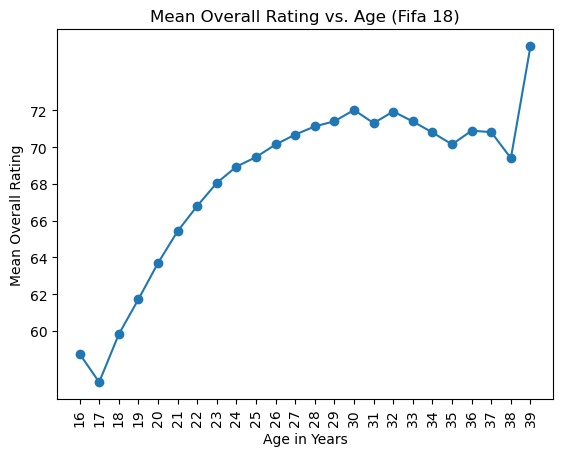

In [41]:


grouped_data_18 = df_fifa.groupby(df_fifa["age_18"])["overall_18"].mean()  # Calculate mean overall rating for each interval



# Line Plot - will give a good visual on max/min values
grouped_data_18.plot(kind="line", marker="o", label="18")
plt.xlabel("Age in Years")
plt.ylabel("Mean Overall Rating")
plt.title("Mean Overall Rating vs. Age (Fifa 18)")
plt.yticks([60, 62, 64, 66, 68, 70, 72])
plt.xticks([16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39])



plt.xticks(rotation=90)




plt.show()

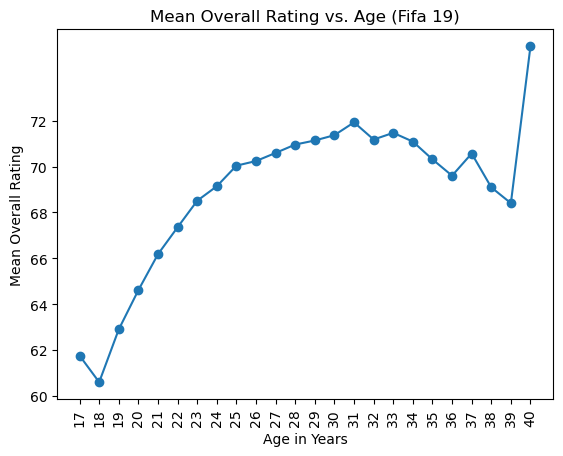

In [42]:
grouped_data_19 = df_fifa.groupby(df_fifa["age_19"])["overall_19"].mean()  # Calculate mean overall rating for each interval



# Line Plot - will give a good visual on max/min values
grouped_data_19.plot(kind="line", marker="o")
plt.xlabel("Age in Years")
plt.ylabel("Mean Overall Rating")
plt.title("Mean Overall Rating vs. Age (Fifa 19)")
plt.yticks([60, 62, 64, 66, 68, 70, 72])
plt.xticks([17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,])

plt.xticks(rotation=90)


plt.show()

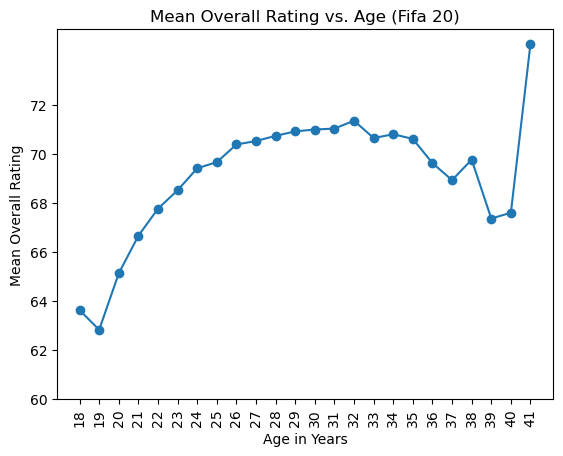

In [43]:
grouped_data_20 = df_fifa.groupby(df_fifa["age"])["overall"].mean()  # Calculate mean overall rating for each interval



# Line Plot - will give a good visual on max/min values
grouped_data_20.plot(kind="line", marker="o")
plt.xlabel("Age in Years")
plt.ylabel("Mean Overall Rating")
plt.title("Mean Overall Rating vs. Age (Fifa 20)")
plt.yticks([60, 62, 64, 66, 68, 70, 72])
plt.xticks([18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41])

plt.xticks(rotation=90)


plt.show()

In [44]:
# There seems to be an outlier for the oldest players, let's see why:

value_counts_18 = df_fifa['age_18'].value_counts()
print(value_counts_18)

value_counts_19 = df_fifa['age_19'].value_counts()
print(value_counts_19)

value_counts_20 = df_fifa['age'].value_counts()
print(value_counts_20)

# We can see there are only 4 readings for the oldest players on each fifa, this is not enough data points to accurately create a mean value

25    920
23    849
24    844
22    783
26    775
21    747
20    694
27    688
28    607
29    596
19    532
30    417
31    352
18    284
33    228
32    225
17    143
34     80
35     60
36     30
37     11
38     10
16      8
39      4
Name: age_18, dtype: int64
26    917
24    851
25    844
23    784
27    774
22    748
21    698
28    691
29    606
30    596
20    531
31    420
32    350
19    280
34    228
33    224
18    142
35     80
36     60
37     30
38     11
39     10
17      8
40      4
Name: age_19, dtype: int64
27    917
25    853
26    843
24    782
28    773
23    749
22    699
29    691
30    605
31    597
21    530
32    420
33    350
20    280
35    228
34    224
19    143
36     80
37     60
38     30
39     11
40     10
18      8
41      4
Name: age, dtype: int64


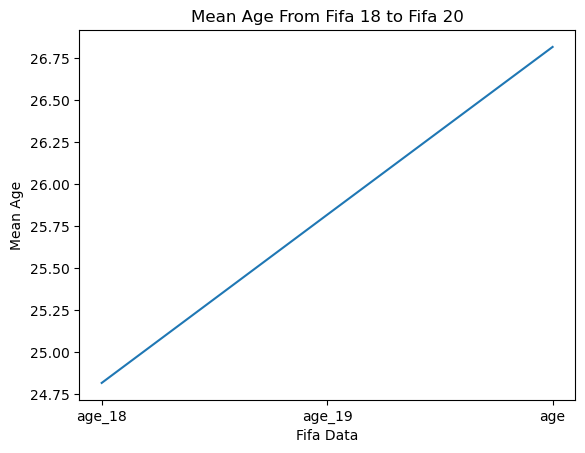

In [45]:
# Create a line plot to show if the mean age of players differs from Fifa 18 to Fifa 20

mean_age = df_fifa[["age_18", "age_19", "age"]].mean()

plt.plot(mean_age.index, mean_age.values)

plt.xlabel('Fifa Data')
plt.ylabel('Mean Age')
plt.title('Mean Age From Fifa 18 to Fifa 20')

plt.show()

# mean age increases nearly exactly by a year each game

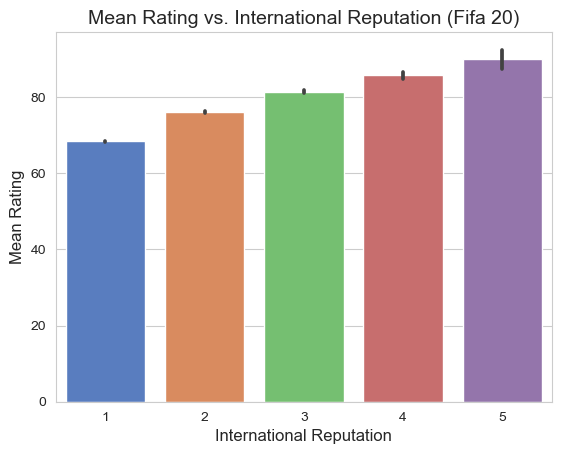

In [46]:
# Create the bar plot with customized style
sns.set_style("whitegrid")
sns.barplot(x="international_reputation", y="overall", data=df_fifa, palette="muted")

# Set labels and title
plt.xlabel("International Reputation", fontsize=12)
plt.ylabel("Mean Rating", fontsize=12)
plt.title("Mean Rating vs. International Reputation (Fifa 20)", fontsize=14)

# Display the plot
plt.show()

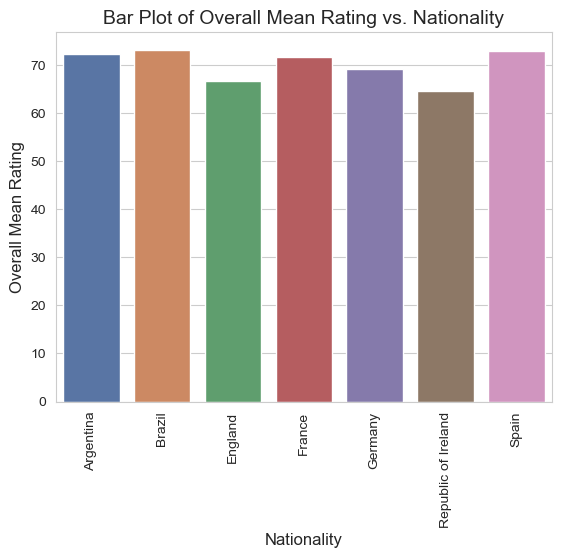

In [47]:
# Create a bar plot to show if the mean rating differs by nationality

selected_nationalities = ["England", "Germany", "France", "Brazil", "Argentina", "Spain", "Republic of Ireland"]
                          

# Filter the DataFrame to include only the selected nationalities
filtered_df = df_fifa[df_fifa["nationality"].isin(selected_nationalities)]
                          
# Calculate the average rating for each nationality
avg_rating = filtered_df.groupby("nationality")["overall"].mean().reset_index()

# Create the bar plot using Seaborn
sns.barplot(x="nationality", y="overall", data=avg_rating, palette="deep")

plt.xlabel("Nationality", fontsize=12)
plt.ylabel("Overall Mean Rating", fontsize=12)
plt.title("Bar Plot of Overall Mean Rating vs. Nationality", fontsize=14)


# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

In [48]:
print(avg_rating)

           nationality    overall
0            Argentina  72.273084
1               Brazil  73.199170
2              England  66.663480
3               France  71.586331
4              Germany  69.213542
5  Republic of Ireland  64.515464
6                Spain  72.962145


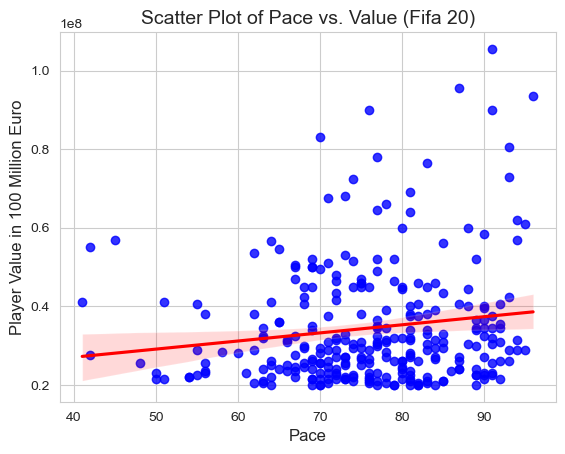

In [49]:
# Filter to remove all goalkeepers (pace=0) and players with value under 20 mil (too many data points)

filtered_df = df_fifa[df_fifa["pace"] != 0]
filtered_df = filtered_df[filtered_df["value_eur"] >= 20000000]

sns.regplot(x="pace", y="value_eur", data=filtered_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.xlabel("Pace", fontsize=12)
plt.ylabel("Player Value in 100 Million Euro", fontsize=12)
plt.title("Scatter Plot of Pace vs. Value (Fifa 20)", fontsize=14)

plt.show()